In [292]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [293]:
# Carregar o dataset
df_salario = pd.read_csv('../datasets/dataset_salario.csv')

In [294]:
# Inspecionar a estrutura do DataFrame
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [295]:
# Copiar DF para DF EDA
df_salario_eda = df_salario.copy()

# Copiar DF para DF Bucketing
df_salario_bucketing = df_salario.copy()

### EDA

In [296]:
# Visualizar os dados
df_salario_eda.head()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20


In [297]:
# Detectar valores ausentes
df_salario_eda.isnull().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [298]:
# Medidas estatísticas 
df_salario_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='tempo_na_empresa'>

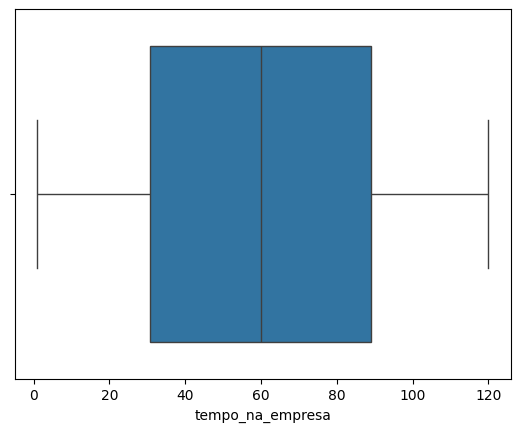

In [299]:
# Verificar outliers
sns.boxplot(data=df_salario_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

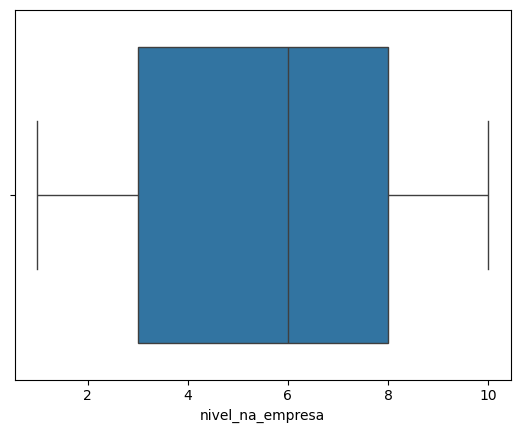

In [300]:
# Verificar outliers
sns.boxplot(data=df_salario_eda, x='nivel_na_empresa')

<Axes: xlabel='salario_em_reais'>

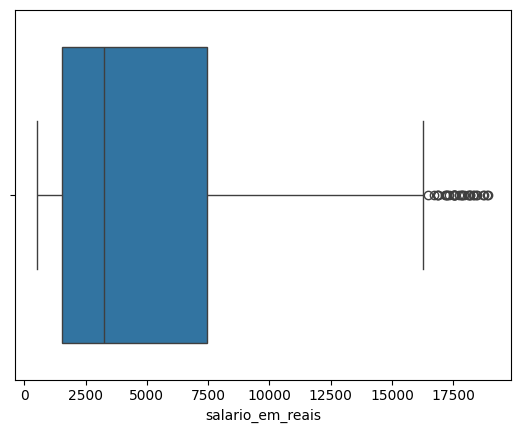

In [301]:
# Verificar outliers
sns.boxplot(data=df_salario_eda, x='salario_em_reais')

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

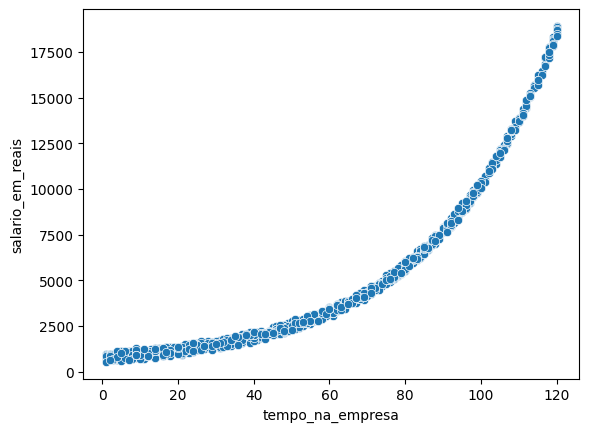

In [302]:
# Cruzamento variáveis numéricas com salário em reais (variável dependente)
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

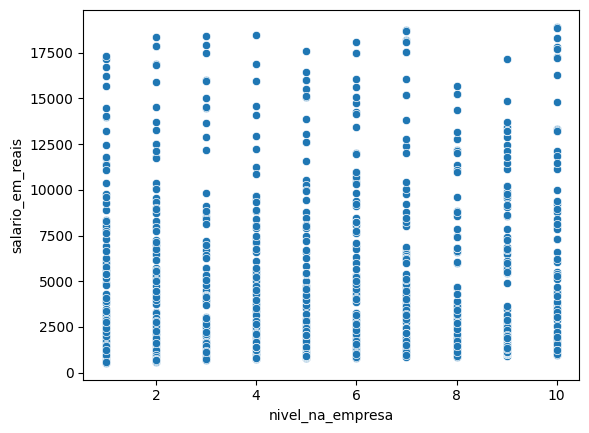

In [303]:
# Cruzamento variáveis numéricas com salário em reais (variável dependente)
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='tempo_na_empresa'>

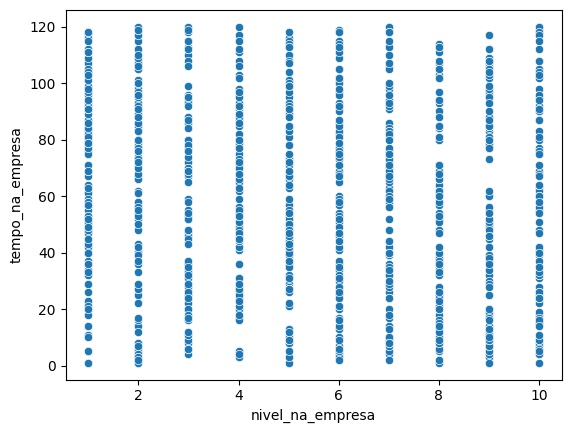

In [304]:
# Cruzamento variáveis numéricas com salário em reais (variável dependente)
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='tempo_na_empresa')

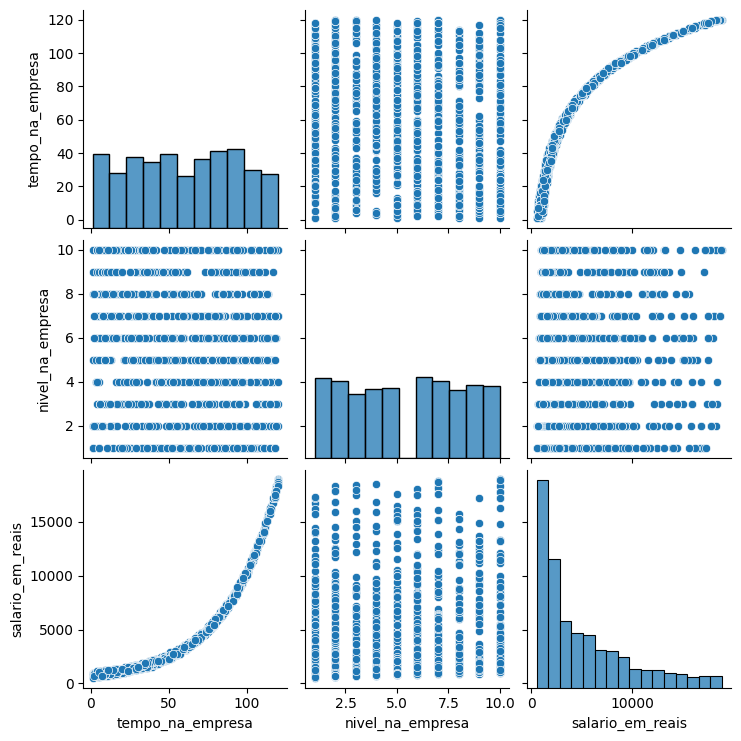

In [305]:
# Histograma das variávaies
sns.pairplot(df_salario_eda)

<Axes: >

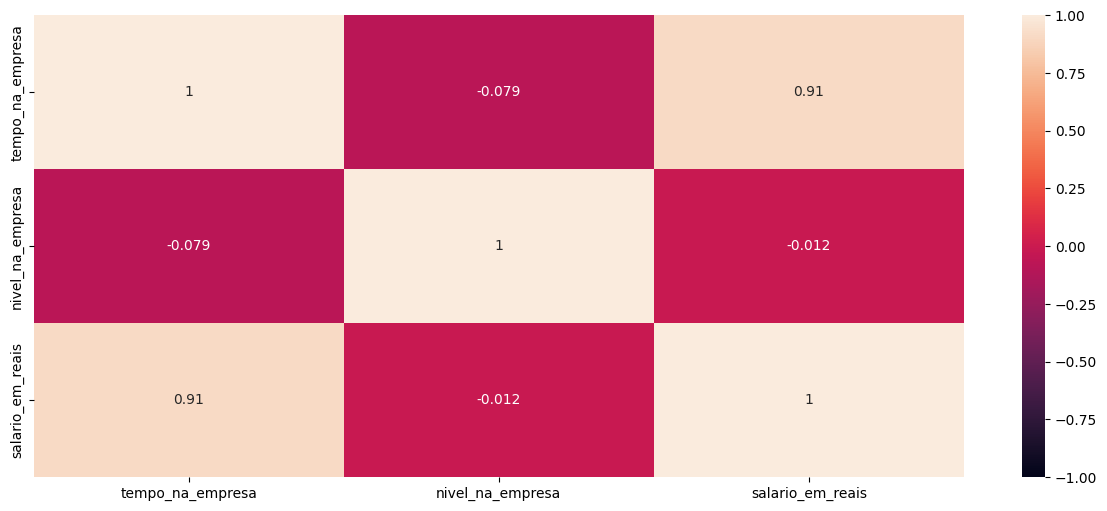

In [306]:
# Mapa de Calor
plt.figure(figsize=(15,6))
sns.heatmap(df_salario_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

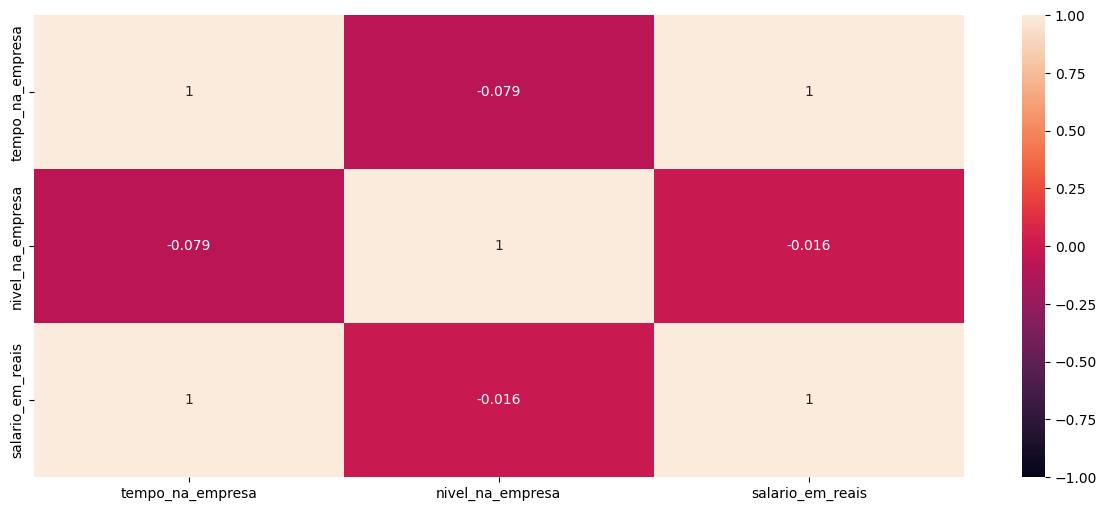

In [307]:
# Mapa de Calor Spearman
plt.figure(figsize=(15,6))
sns.heatmap(df_salario_eda.corr('spearman'), vmin=-1, vmax=1, annot=True)

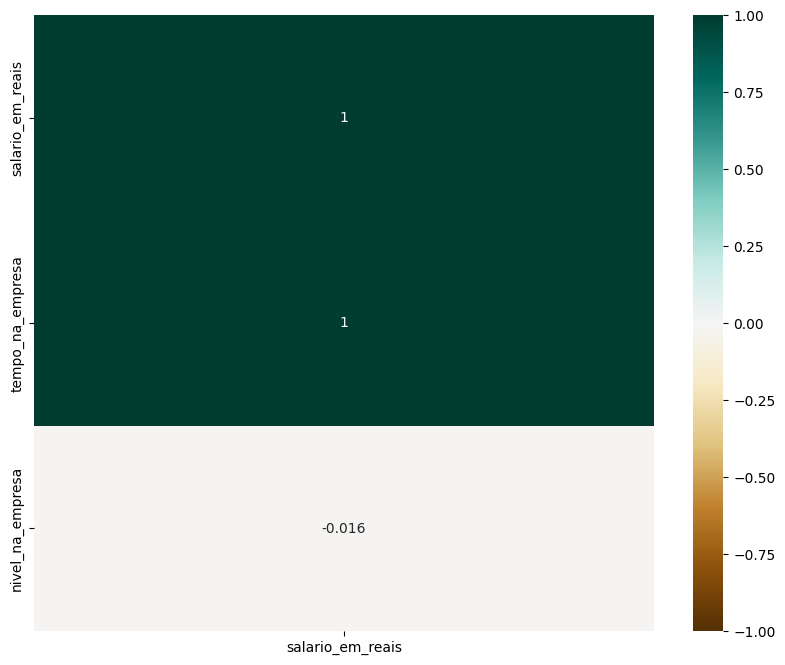

In [308]:
# Formato de Ranking
plt.figure(figsize=(10, 8))
sns.heatmap(df_salario_eda.corr('spearman')[['salario_em_reais']].sort_values(by='salario_em_reais', ascending=False), 
            vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()


In [309]:
# Bucketing tempo de casa
bins_tempo_de_casa = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels_tempo_casa = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129']

df_salario_bucketing['escala_tempo'] = pd.cut(x=df_salario_bucketing['tempo_na_empresa'],
                                              bins=bins_tempo_de_casa, labels=labels_tempo_casa, include_lowest=True)


In [310]:
df_salario_bucketing.head()


,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

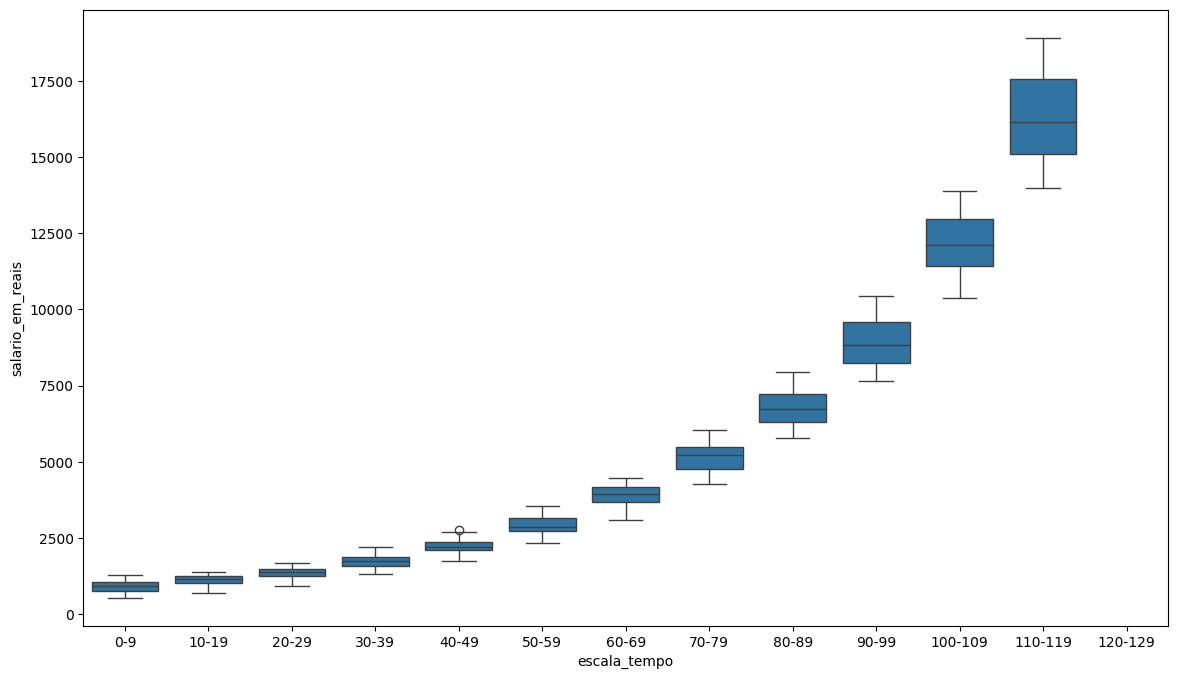

In [311]:
plt.figure(figsize=(14,8))
sns.boxplot(df_salario_bucketing, x='escala_tempo', y='salario_em_reais')

### Treinamento

In [312]:
# Importar

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, root_mean_squared_error

import numpy as np

In [313]:
# Criar o Dataset de Treino e Teste
X = df_salario.drop(columns='salario_em_reais', axis=1)
y = df_salario['salario_em_reais']


In [314]:
# Split usando KFold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [315]:
kf

KFold(n_splits=5, random_state=51, shuffle=True)

In [316]:
# Bloco para Treinamento do Modelo

# Pipeline 
# Padronizar variáveis numéricas - tempo_na_empresa, nivel_na_empresa

# Nomes das colunas
colunas_numéricas = ['tempo_na_empresa', 'nivel_na_empresa']

# Transformer para Colunas Numéricas
transformer_numericas = Pipeline(steps=[('scaler', StandardScaler())])

# Criar um columnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numéricas)
    ]
)

# Criando o Pipeline principal - pré processamento + treinamento
model_regr = Pipeline(steps=[('preprocesssor', preprocessor), 
                             ('regressor', LinearRegression())])

In [317]:
model_regr

Pipeline(steps=[('preprocesssor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tempo_na_empresa',
                                                   'nivel_na_empresa'])])),
                ('regressor', LinearRegression())])

In [318]:
# primeiro split, usar para teste e os outros 4 para treino.
# depois o segundo, e os outros 4 para treino.

In [319]:
# Armazenar RMSE (root mean squared error) Treino e Treino
rmse_scores_fold_train = []
rmse_scores_fold_test = []

# Armazenar R2 Score de Teste
r2score_fold_test = []

# Armazenar Resíduos
residuos = []

# Armazenar Predições
y_pred_total = []



In [320]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = X.iloc[train_index], X.iloc[test_index]


    # Treinamento do modelo 
    model_regr.fit(X_train, y_train)

    # Faça predições nos conjuntos de treinamento e teste
    y_train_pred = model_regr.predict(X_train)
    y_test_pred = model_regr.predict(X_test)

    # Calcule o RMSE para os conjuntos de treinamento e teste
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

    r2score_test = r2_score(y_test, y_test_pred)
    residuos_test = np.array(y_test - y_test_pred)

    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_test_pred)
    
rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2score_test_final = np.mean(r2score_fold_test)

percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)

/Users/luca/Documents/development/rocketseat/ML/modelos_regressao_linear/venv/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/luca/Documents/development/rocketseat/ML/modelos_regressao_linear/venv/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/luca/Documents/development/rocketseat/ML/modelos_regressao_linear/venv/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/luca/Documen

### Análise de Métricas - Modelo Linear

In [321]:
# Métricas
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final}')
print(f'R2Score Teste: {r2score_test_final}')


RMSE Treino: 4.193368282449577e-15
RMSE Teste: 4.1049976058199e-15
% Dif. RMSE Treino e Teste: -2.1073912587056385
R2Score Teste: 1.0


### Análise de Resíduos

In [322]:
# Transformar resíduos na escala paddão 
# (X - média) / desvio_padrão
from scipy.stats import zscore
residuos_std = zscore(residuos)

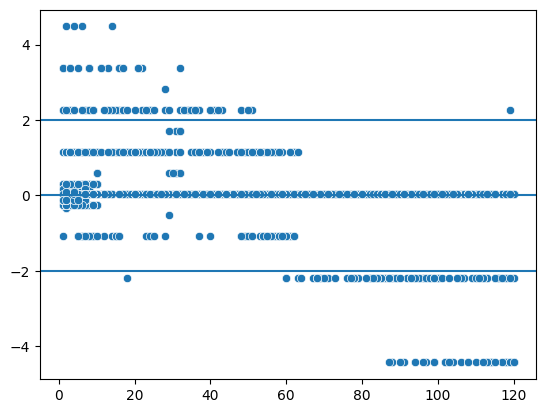

In [323]:
# Verificar linearidade dos resíduos : Valores entre -2 e +2 (Escala padrão)
# Verificar homocedasticidade: Valores em torno da reta sem nenhuma tendência ou formato

sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

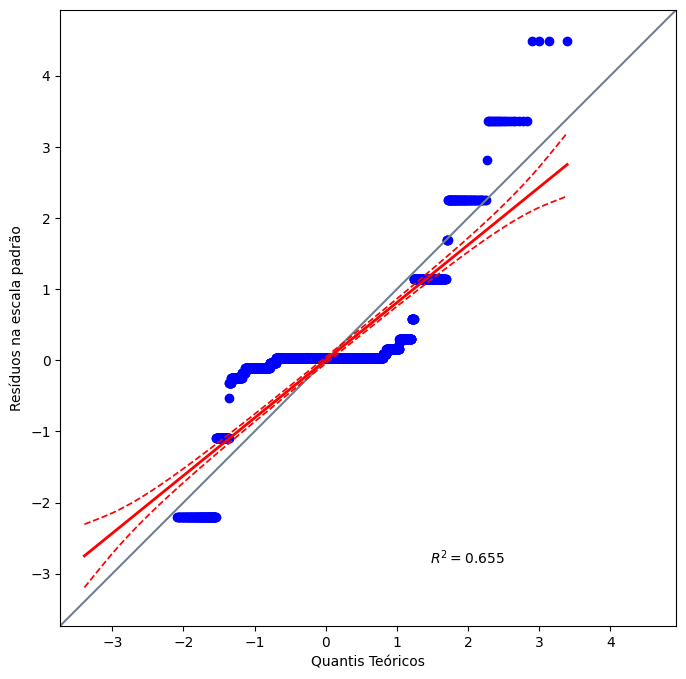

In [325]:
# Checkar se resíduos sefguem uma distribuição normal
# QQ plot
import pingouin as pg
plt.figure(figsize=(14, 8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()